# Raw Data Preprocessing Pipeline Tutorial

In this tutorial, we demonstrate how to build a raw data preprocessing pipeline using your existing codebase. The pipeline will focus on denoising and artifact removal for various biosignals such as Electrodermal Activity (EDA), Electromyogram (EMG), and Respiration signals. 

We'll cover:

- Setting up the environment and required imports
- Simulating raw signals for demonstration
- Building custom preprocessing functions for each signal type
- Visualizing the effect of the preprocessing steps

Feel free to expand and customize the routines to best fit your data and needs.

## Setup & Imports

First, we import the necessary libraries for numerical computations, signal processing, and visualization.

In [1]:
import sys
import os

# Get the repository root folder (assuming the notebook is in /your-project-root/notebooks)
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print("Project root added to sys.path:", project_root)

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import pywt  # For potential wavelet denoising

# Set random seed for reproducibility
np.random.seed(42)

# Plot inline if using Jupyter Notebook
%matplotlib inline

Project root added to sys.path: /Users/linh/Downloads/ECGPreprocessor


## Simulating Raw Biosignals

For demonstration purposes, we'll simulate raw signals for:

- **EDA (Electrodermal Activity):** Typically a slow-varying signal with minor high-frequency noise.
- **EMG (Electromyogram):** Characterized by higher-frequency content with bursts during muscle activity.
- **Respiration:** A low-frequency oscillatory signal with some noise.

We use simple sine functions and random noise to mimic these signals.

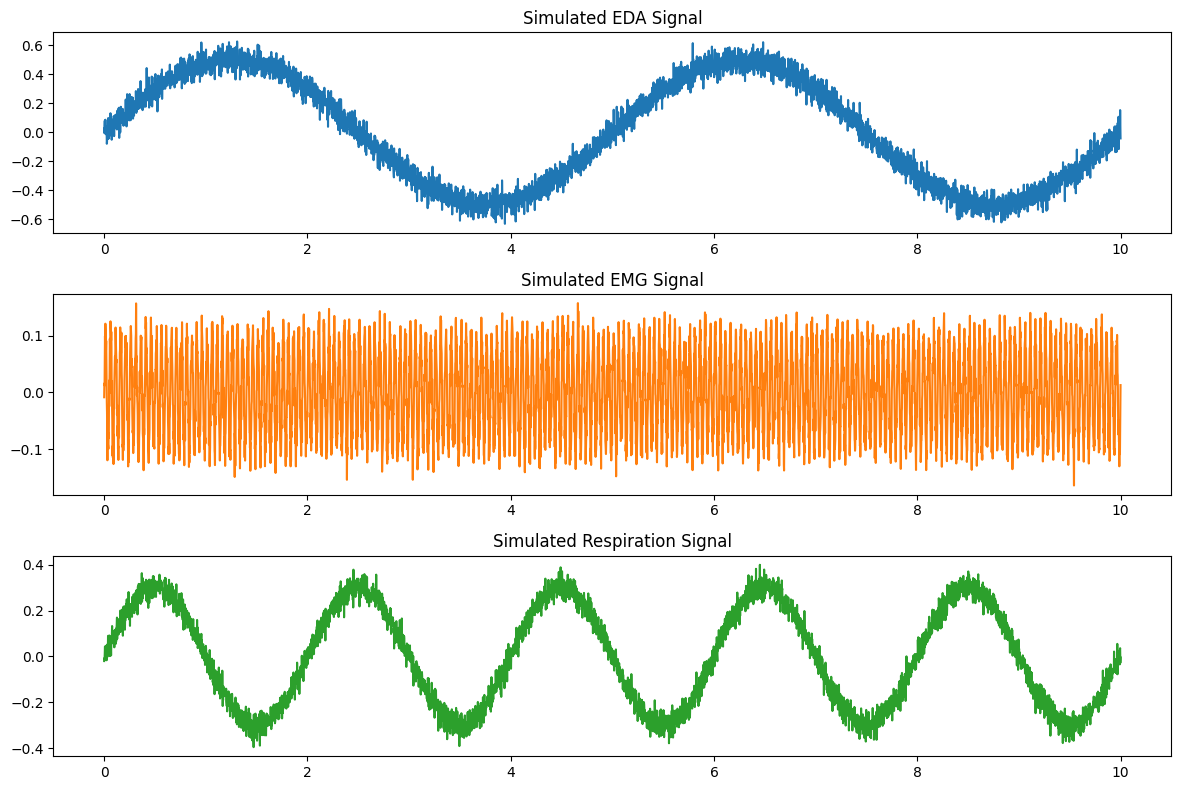

In [2]:
fs = 500  # Sampling frequency in Hz
t = np.linspace(0, 10, fs * 10)  # 10-second duration

# Simulate EDA: slow-varying trend plus random noise
eda = 0.5 * np.sin(0.2 * 2 * np.pi * t) + 0.05 * np.random.randn(len(t))

# Simulate EMG: higher-frequency oscillations plus noise
emg = 0.1 * np.sin(20 * 2 * np.pi * t) + 0.02 * np.random.randn(len(t))

# Simulate Respiration: low-frequency oscillatory signal plus noise
resp = 0.3 * np.sin(0.5 * 2 * np.pi * t) + 0.03 * np.random.randn(len(t))

plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(t, eda, color='tab:blue')
plt.title('Simulated EDA Signal')

plt.subplot(3, 1, 2)
plt.plot(t, emg, color='tab:orange')
plt.title('Simulated EMG Signal')

plt.subplot(3, 1, 3)
plt.plot(t, resp, color='tab:green')
plt.title('Simulated Respiration Signal')

plt.tight_layout()
plt.show()

## Preprocessing Functions

Next, we define custom functions to preprocess each type of signal. 

### EDA Preprocessing

Since EDA is generally a slow-varying signal, a low-pass filter can be used to remove high-frequency noise.

### EMG Preprocessing

EMG signals benefit from a bandpass filter to retain the muscular activity frequencies and remove both low- and high-frequency noise. Often, rectification (taking the absolute value) and smoothing (applying a low-pass filter) are applied afterward.

### Respiration Preprocessing

A low-pass filter is also effective for respiration signals to smooth out rapid noise while preserving the primary oscillatory behavior.

In [3]:
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def filter_signal(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# EDA: Apply a low-pass filter to remove high-frequency noise
def clean_eda(signal, fs):
    cutoff = 0.5  # Hz
    return filter_signal(signal, cutoff, fs, order=3)

# EMG: Apply a bandpass filter, rectify, then smooth
from scipy.signal import butter, filtfilt

def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def denoise_emg(signal, fs):
    lowcut = 20   # Hz; lower cutoff frequency for EMG
    highcut = 150 # Hz; updated high cutoff to be below the Nyquist frequency (for fs=500 Hz)
    b, a = butter_bandpass(lowcut, highcut, fs, order=4)
    filtered = filtfilt(b, a, signal)
    rectified = np.abs(filtered)
    # Smooth the rectified signal with an additional low-pass filter
    smooth = filter_signal(rectified, 10, fs, order=3)
    return smooth

# Respiration: Apply a low-pass filter to smooth the oscillatory signal
def clean_respiration(signal, fs):
    cutoff = 1  # Hz
    return filter_signal(signal, cutoff, fs, order=3)

## Apply Preprocessing Pipeline

Now, we apply the defined preprocessing functions to the simulated signals and visualize the results.

In [4]:
eda_clean = clean_eda(eda, fs)
emg_clean = denoise_emg(emg, fs)
resp_clean = clean_respiration(resp, fs)

plt.figure(figsize=(12, 10))

plt.subplot(3, 1, 1)
plt.plot(t, eda, label='Raw EDA', alpha=0.6)
plt.plot(t, eda_clean, label='Cleaned EDA', linewidth=2)
plt.title('EDA Signal Processing')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, emg, label='Raw EMG', alpha=0.6)
plt.plot(t, emg_clean, label='Denoised EMG', linewidth=2)
plt.title('EMG Signal Processing')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, resp, label='Raw Respiration', alpha=0.6)
plt.plot(t, resp_clean, label='Cleaned Respiration', linewidth=2)
plt.title('Respiration Signal Processing')
plt.legend()

plt.tight_layout()
plt.show()

ValueError: Digital filter critical frequencies must be 0 < Wn < 1

## Next Steps

This notebook demonstrated how to build a basic raw data preprocessing pipeline for denoising EDA, EMG, and Respiration signals. Here are some ideas to extend this work:

- **Advanced Denoising:** Integrate wavelet denoising using the `pywt` library or other sophisticated techniques.
- **Artifact Removal:** Add routines to detect and remove motion or electrical artifacts.
- **Integration:** Incorporate your existing codebase components into this pipeline to work with your real-world data.

Feel free to experiment with different filter parameters, preprocessing methods, and signal enhancement strategies to best suit your application.